Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - class_output_accuracy: 0.3332 - loss: 22.4191 - reg_output_mae: 4.2547 - val_class_output_accuracy: 0.2444 - val_loss: 14.8207 - val_reg_output_mae: 3.1543
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - class_output_accuracy: 0.4171 - loss: 15.0462 - reg_output_mae: 3.2693 - val_class_output_accuracy: 0.3556 - val_loss: 11.8473 - val_reg_output_mae: 2.7054
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - class_output_accuracy: 0.3682 - loss: 12.8562 - reg_output_mae: 3.0072 - val_class_output_accuracy: 0.3111 - val_loss: 9.0409 - val_reg_output_mae: 2.2524
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - class_output_accuracy: 0.4094 - loss: 9.5439 - reg_output_mae: 2.4869 - val_class_output_accuracy: 0.6667 - val_loss: 6.5453 - val_reg_output_mae: 1.8797
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - class_output_accuracy: 0.6155 - loss: 6.6930 - reg_output_mae: 2.0132 - val_class_output_accuracy: 0.7111 -

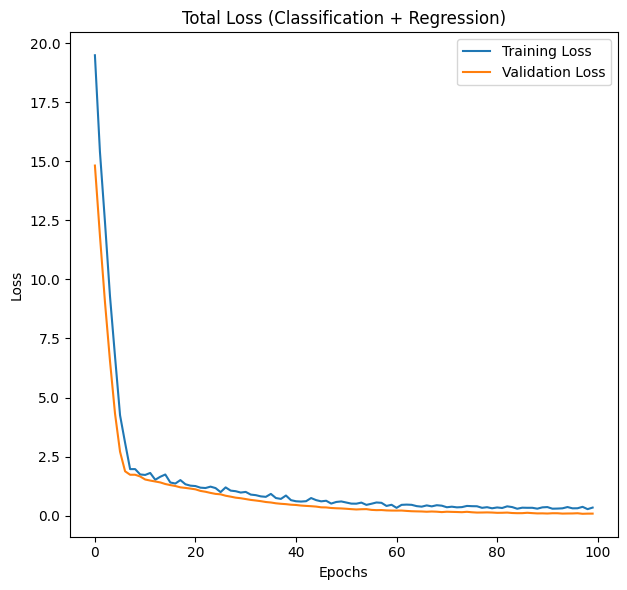

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical


iris = load_iris()
X = iris.data
y = iris.target


y_class = to_categorical(y, num_classes=3)

y_regression = X[:, 2]
X_train, X_val, y_class_train, y_class_val, y_regression_train, y_regression_val = train_test_split(
    X, y_class, y_regression, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


input_layer = Input(shape=(X_train.shape[1],))


x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)

class_output = Dense(3, activation='softmax', name='class_output')(x)

reg_output = Dense(1, activation='linear', name='reg_output')(x)

model = Model(inputs=input_layer, outputs=[class_output, reg_output])

model.compile(optimizer=Adam(),
              loss={'class_output': 'categorical_crossentropy', 'reg_output': 'mse'},
              metrics={'class_output': 'accuracy', 'reg_output': 'mae'})

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train,
                    {'class_output': y_class_train, 'reg_output': y_regression_train},
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_val, {'class_output': y_class_val, 'reg_output': y_regression_val}),
                    callbacks=[early_stopping])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Total Loss (Classification + Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
